In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\German Breast Cancer Study Group\German Breast Cancer Study Group.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display statistical summary
print("\nStatistical Summary:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   Unnamed: 0   pid  age  meno  size  grade  nodes  pgr  er  hormon  rfstime  \
0           1   132   49     0    18      2      2    0   0       0     1838   
1           2  1575   55     1    20      3     16    0   0       0      403   
2           3  1140   56     1    40      3      3    0   0       0     1603   
3           4   769   45     0    25      3      1    0   4       0      177   
4           5   130   65     1    30      2      5    0  36       1     1855   

   status  
0       0  
1       1  
2       0  
3       0  
4       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  686 non-null    int64
 1   pid         686 non-null    int64
 2   age         686 non-null    int64
 3   meno        686 non-null    int64
 4   size        686 non-null    int64
 5   grade       686 non-null

In [5]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load the dataset
data = pd.read_csv('E:\PROJECT-AI-ML\German Breast Cancer Study Group\German Breast Cancer Study Group.csv')

# Display the first few rows of the dataset
print("Dataset Overview:")
print(tabulate(data.head(), headers='keys', tablefmt='psql'))

# Display dataset information
print("\nDataset Information:")
data_info = data.info()
print(data_info)

# Display statistical summary
print("\nStatistical Summary:")
print(tabulate(data.describe(), headers='keys', tablefmt='psql'))

# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(tabulate(missing_values.reset_index(), headers=['Column', 'Missing Values'], tablefmt='psql'))

Dataset Overview:
+----+--------------+-------+-------+--------+--------+---------+---------+-------+------+----------+-----------+----------+
|    |   Unnamed: 0 |   pid |   age |   meno |   size |   grade |   nodes |   pgr |   er |   hormon |   rfstime |   status |
|----+--------------+-------+-------+--------+--------+---------+---------+-------+------+----------+-----------+----------|
|  0 |            1 |   132 |    49 |      0 |     18 |       2 |       2 |     0 |    0 |        0 |      1838 |        0 |
|  1 |            2 |  1575 |    55 |      1 |     20 |       3 |      16 |     0 |    0 |        0 |       403 |        1 |
|  2 |            3 |  1140 |    56 |      1 |     40 |       3 |       3 |     0 |    0 |        0 |      1603 |        0 |
|  3 |            4 |   769 |    45 |      0 |     25 |       3 |       1 |     0 |    4 |        0 |       177 |        0 |
|  4 |            5 |   130 |    65 |      1 |     30 |       2 |       5 |     0 |   36 |        1 |      

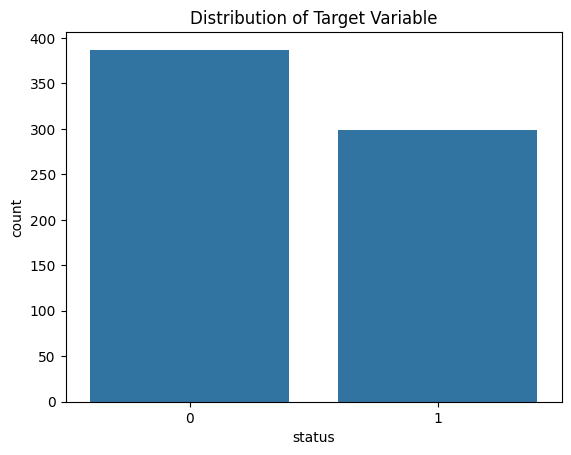

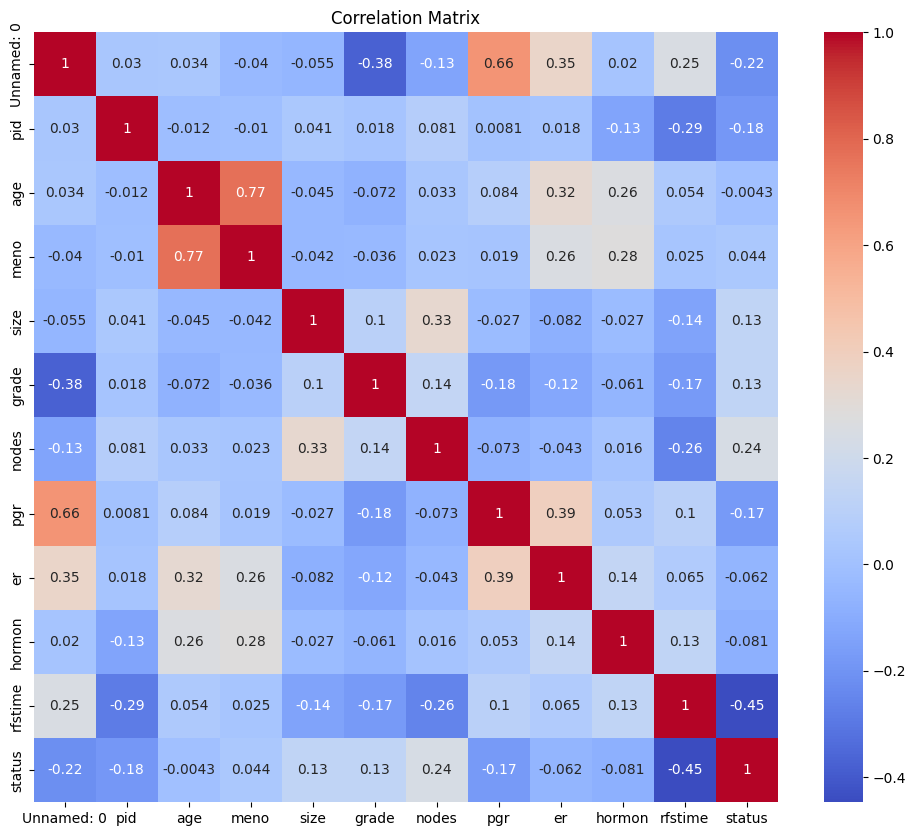


Training Set Shape:
+---------+-----------+
| Set     | Shape     |
|---------+-----------|
| X_train | (548, 11) |
| y_train | (548,)    |
+---------+-----------+

Testing Set Shape:
+--------+-----------+
| Set    | Shape     |
|--------+-----------|
| X_test | (138, 11) |
| y_test | (138,)    |
+--------+-----------+
Accuracy: 0.72


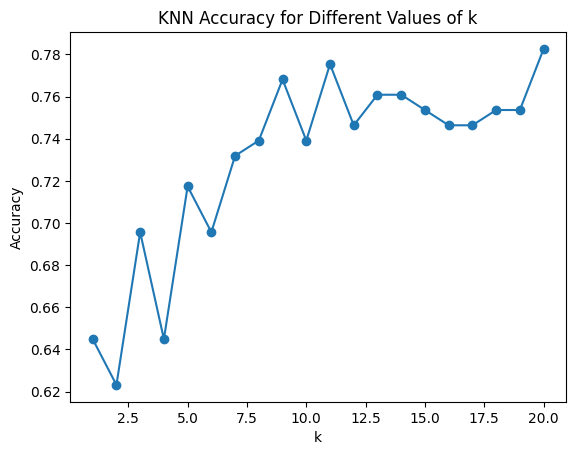

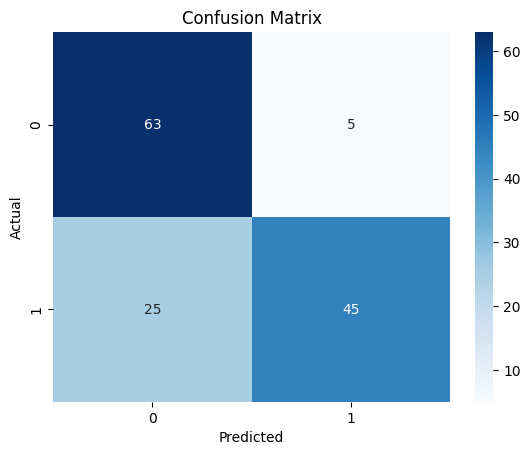


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        68
           1       0.90      0.64      0.75        70

    accuracy                           0.78       138
   macro avg       0.81      0.78      0.78       138
weighted avg       0.81      0.78      0.78       138



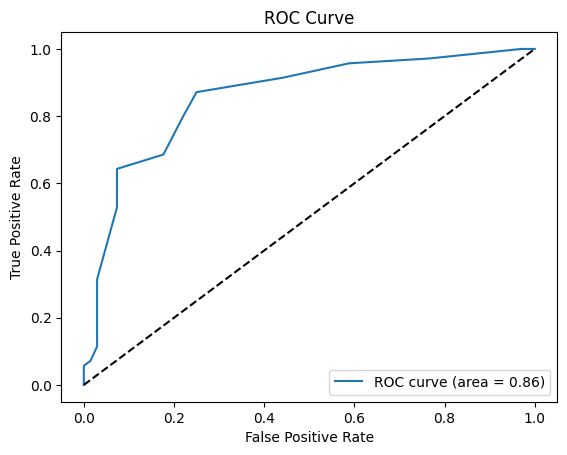

k-Fold Cross Validation Accuracy: 0.77 ± 0.04


In [7]:
# Visualize the distribution of the target variable
sns.countplot(x='status', data=data)
plt.title('Distribution of Target Variable')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Define features (X) and target (y)
X = data.drop(columns=['status']).values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape:")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape:")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

# Rebuild KNN Classification Model Using Different Values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report:")
print(class_report)

# ROC - AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# k-Fold Cross Validation
kf = KFold(n_splits=10, random_state=42, shuffle=True)
cv_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
print(f'k-Fold Cross Validation Accuracy: {np.mean(cv_scores):.2f} ± {np.std(cv_scores):.2f}')


Training Set Shape (Condition 1):
+---------+----------+
| Set     | Shape    |
|---------+----------|
| X_train | (548, 5) |
| y_train | (548,)   |
+---------+----------+

Testing Set Shape (Condition 1):
+--------+----------+
| Set    | Shape    |
|--------+----------|
| X_test | (138, 5) |
| y_test | (138,)   |
+--------+----------+
Accuracy (Condition 1): 0.58


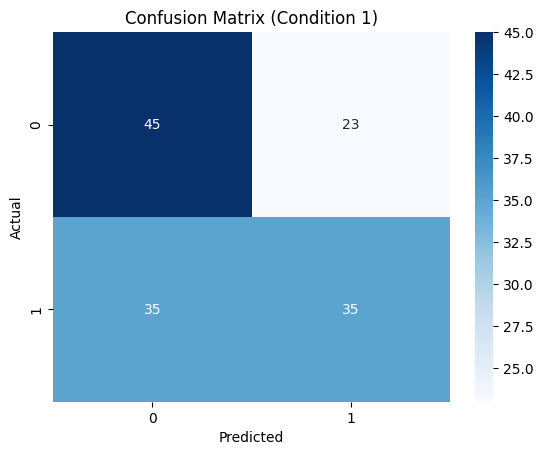


Classification Report (Condition 1):
              precision    recall  f1-score   support

           0       0.56      0.66      0.61        68
           1       0.60      0.50      0.55        70

    accuracy                           0.58       138
   macro avg       0.58      0.58      0.58       138
weighted avg       0.58      0.58      0.58       138



In [8]:
# Subset of features
features = ['age', 'size', 'grade', 'nodes', 'pgr']

# Define features (X) and target (y)
X = data[features].values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape (Condition 1):")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape (Condition 1):")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (Condition 1): {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Condition 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report (Condition 1):")
print(class_report)


Training Set Shape (Condition 1):
+---------+----------+
| Set     | Shape    |
|---------+----------|
| X_train | (548, 5) |
| y_train | (548,)   |
+---------+----------+

Testing Set Shape (Condition 1):
+--------+----------+
| Set    | Shape    |
|--------+----------|
| X_test | (138, 5) |
| y_test | (138,)   |
+--------+----------+
Accuracy (Condition 1): 0.58


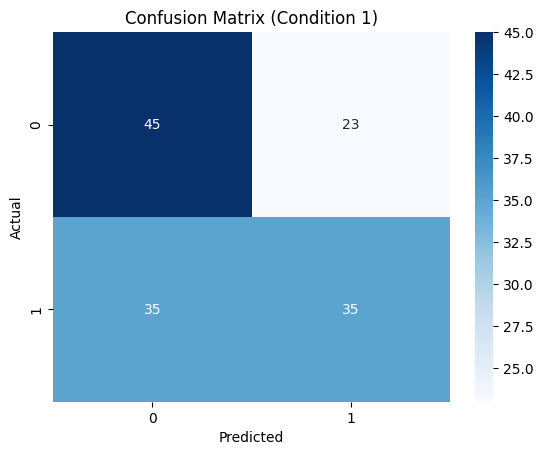


Classification Report (Condition 1):
              precision    recall  f1-score   support

           0       0.56      0.66      0.61        68
           1       0.60      0.50      0.55        70

    accuracy                           0.58       138
   macro avg       0.58      0.58      0.58       138
weighted avg       0.58      0.58      0.58       138



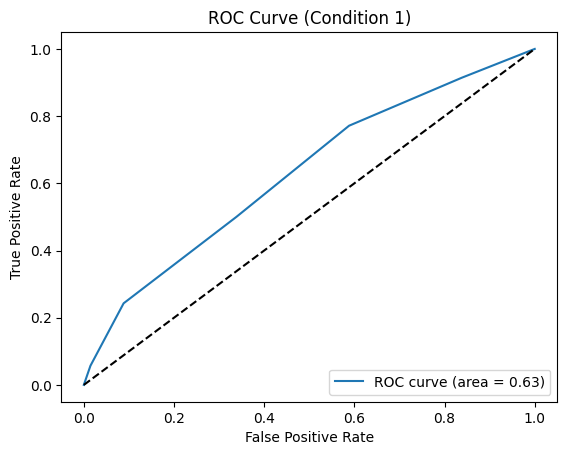

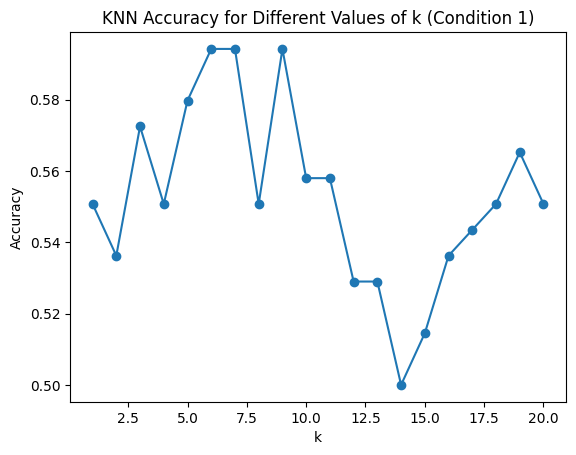

In [9]:
# Subset of features
features = ['age', 'size', 'grade', 'nodes', 'pgr']

# Define features (X) and target (y)
X = data[features].values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape (Condition 1):")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape (Condition 1):")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (Condition 1): {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Condition 1)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report (Condition 1):")
print(class_report)

# ROC - AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Condition 1)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Rebuild KNN Classification Model Using Different Values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k (Condition 1)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


Training Set Shape (Condition 2):
+---------+-----------+
| Set     | Shape     |
|---------+-----------|
| X_train | (548, 11) |
| y_train | (548,)    |
+---------+-----------+

Testing Set Shape (Condition 2):
+--------+-----------+
| Set    | Shape     |
|--------+-----------|
| X_test | (138, 11) |
| y_test | (138,)    |
+--------+-----------+
Accuracy (Condition 2): 0.70


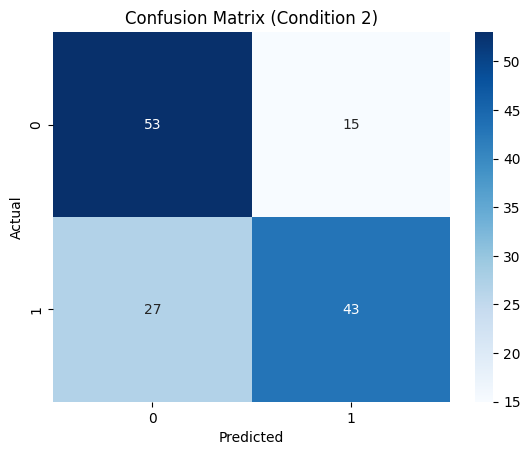


Classification Report (Condition 2):
              precision    recall  f1-score   support

           0       0.66      0.78      0.72        68
           1       0.74      0.61      0.67        70

    accuracy                           0.70       138
   macro avg       0.70      0.70      0.69       138
weighted avg       0.70      0.70      0.69       138



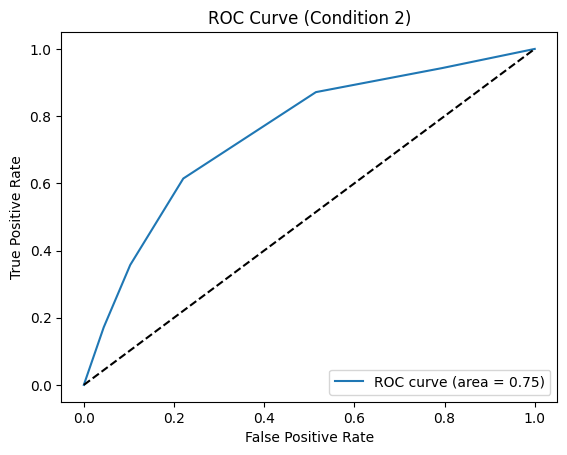

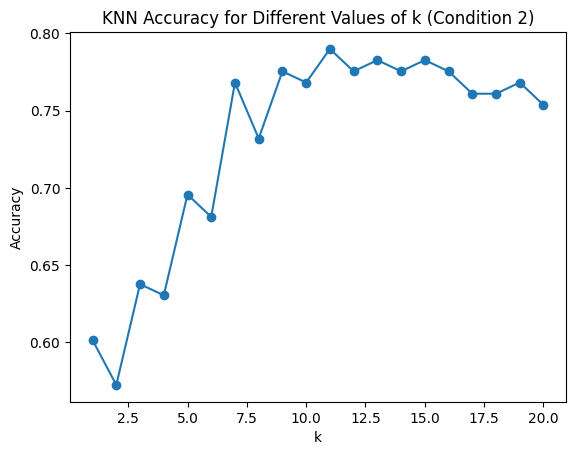

In [10]:
# Define features (X) and target (y)
X = data.drop(columns=['status']).values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape (Condition 2):")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape (Condition 2):")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (Condition 2): {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Condition 2)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report (Condition 2):")
print(class_report)

# ROC - AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Condition 2)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Rebuild KNN Classification Model Using Different Values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k (Condition 2)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


Training Set Shape (Condition 3):
+---------+-----------+
| Set     | Shape     |
|---------+-----------|
| X_train | (548, 11) |
| y_train | (548,)    |
+---------+-----------+

Testing Set Shape (Condition 3):
+--------+-----------+
| Set    | Shape     |
|--------+-----------|
| X_test | (138, 11) |
| y_test | (138,)    |
+--------+-----------+
Accuracy (Condition 3): 0.70


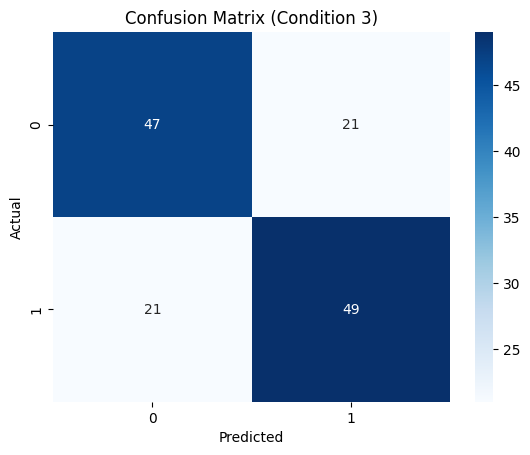


Classification Report (Condition 3):
              precision    recall  f1-score   support

           0       0.69      0.69      0.69        68
           1       0.70      0.70      0.70        70

    accuracy                           0.70       138
   macro avg       0.70      0.70      0.70       138
weighted avg       0.70      0.70      0.70       138



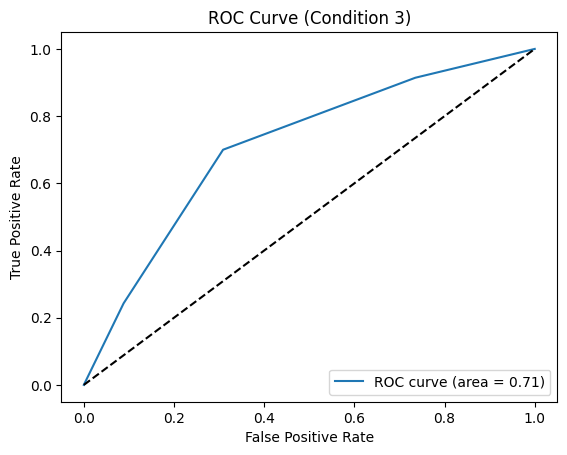

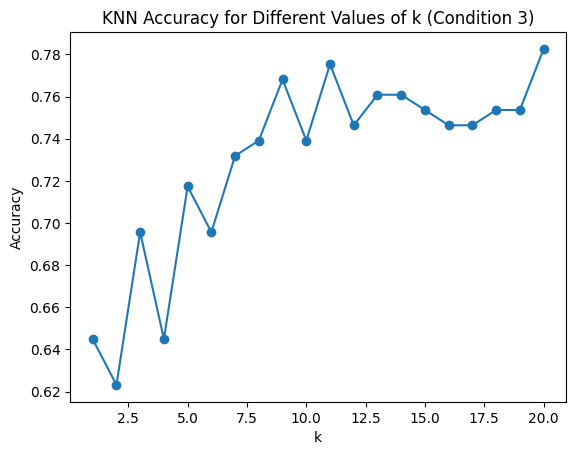

In [11]:
# Define features (X) and target (y)
X = data.drop(columns=['status']).values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape (Condition 3):")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape (Condition 3):")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set with k=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (Condition 3): {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Condition 3)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report (Condition 3):")
print(class_report)

# ROC - AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Condition 3)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Rebuild KNN Classification Model Using Different Values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k (Condition 3)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()


Training Set Shape (Condition 4):
+---------+-----------+
| Set     | Shape     |
|---------+-----------|
| X_train | (548, 11) |
| y_train | (548,)    |
+---------+-----------+

Testing Set Shape (Condition 4):
+--------+-----------+
| Set    | Shape     |
|--------+-----------|
| X_test | (138, 11) |
| y_test | (138,)    |
+--------+-----------+
Accuracy (Condition 4): 0.74


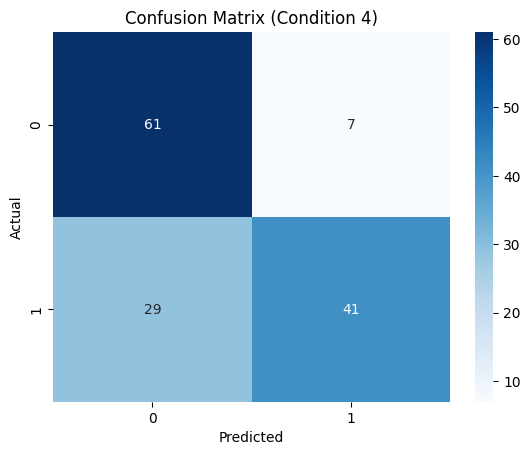


Classification Report (Condition 4):
              precision    recall  f1-score   support

           0       0.68      0.90      0.77        68
           1       0.85      0.59      0.69        70

    accuracy                           0.74       138
   macro avg       0.77      0.74      0.73       138
weighted avg       0.77      0.74      0.73       138



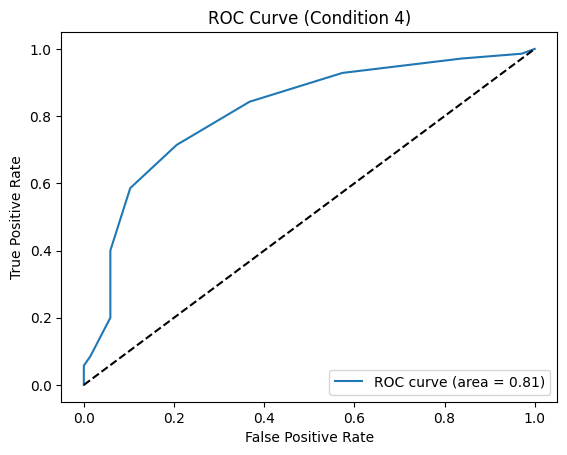

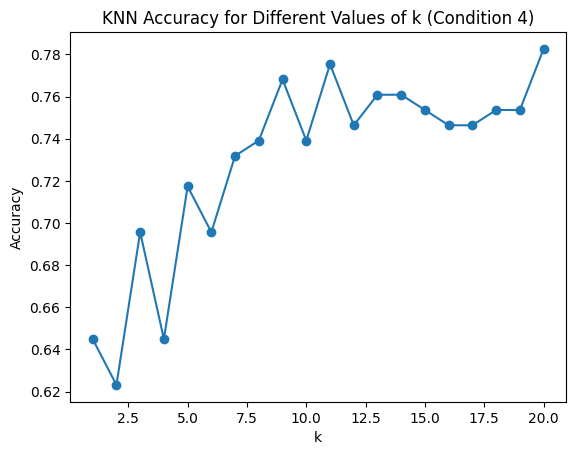

In [12]:
# Define features (X) and target (y)
X = data.drop(columns=['status']).values
y = data['status'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("\nTraining Set Shape (Condition 4):")
print(tabulate([["X_train", X_train.shape], ["y_train", y_train.shape]], headers=['Set', 'Shape'], tablefmt='psql'))
print("\nTesting Set Shape (Condition 4):")
print(tabulate([["X_test", X_test.shape], ["y_test", y_test.shape]], headers=['Set', 'Shape'], tablefmt='psql'))

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit KNN Classifier to the Training Set with k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

# Predict the Test-Set Results
predictions = knn.predict(X_test)

# Check the Accuracy Score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy (Condition 4): {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Condition 4)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Metrics
class_report = classification_report(y_test, predictions)
print("\nClassification Report (Condition 4):")
print(class_report)

# ROC - AUC
y_prob = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve (Condition 4)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Rebuild KNN Classification Model Using Different Values of k
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, predictions))

plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy for Different Values of k (Condition 4)')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()